# Project Wrangle and Analyze Data
### _Author: Anthony T. O'Brien M.D._ 
##### 12th May 2018

# Context

The context of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 

This dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 4 million followers and has received international media coverage. More information on WeRateDogs can be found [here](https://en.wikipedia.org/wiki/WeRateDogs).

# Data

The WeRateDogs Twitter archive contains basic tweet data for 5000+ tweets. The data contains information on the tweet id, the timestamp of the tweet, the source of the tweet, the retweet status of the tweet, the rating in of the dog in the tweet in a ratio format (i.e. nominator and denominator), the name of the dog, and the dog's stage according to WeRateDogs criteria. Additionally we have access to data from Udacity which used neural networks to predict the type of dog in the tweets which posted jpegs. Finally we also have access to the number of retweets and favorites via the twitter API tweepy. 

# Abstract

We gather, assess and clean the above mentioned data and finally merge these data into one file. The file is then used to produce visualizations and insight into the data's contents. 

# Introduction

In this project, we go through the process of wrangling and analyzing data obtained from WeRateDogs. The data is derived from three sources, a .csv file, a url and from twitter's API. Data wrangling is a fundamental skill and involves the processes of gathering, assessing and cleaning data prior to any directed analysis. Data wrangling turns low quality and untidy data, into high quality and tidy (i.e. useful) data. By the end of this project these steps will be completed and then the data will be transfomred into meaningful insights.

# Libraries to be installed 

In [142]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import io
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

# Authentication

In [2]:
#Please note that keys were removed prior to submission of project
consumer_key = 'not_included_in_submitted_project' 
consumer_secret = 'not_included_in_submitted_project'
access_token = 'not_included_in_submitted_project'
access_secret = 'not_included_in_submitted_project'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# 1. Gathering data

In [3]:
#1. Import csv for WeRateDogs twitter data provided by Udacity into a dataframe
df_twitter = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
#Import tsv for image prediction by Udacity

#create folder to store tsv 
folder_name = "dogs_prediction"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

#use request to get tsv from url    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'     
r = requests.get(url)

#save tsv stored in jupyter notebook working memory into dogs_prediction folder
with open(os.path.join(folder_name, 
                       url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)

In [5]:
#2. Import prediction tsv into a dataframe
df_predict = pd.read_csv("/home/workspace/dogs_prediction/image-predictions.tsv", sep="\t")

In [6]:
#3. Create json file, convert to list, and load into dataframe
deleted_tweets= []
with open(os.path.join(os.getcwd(), 'tweet_json.txt'), mode = 'w') as file:
    for twt_id in df_twitter["tweet_id"]:
        try:
            tweet = api.get_status(twt_id, tweet_mode = 'extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            twt_sjson = json.dumps(tweet._json)
            file.write(twt_sjson + '\n')
        except:
            print('Tweet id was not found')
            deleted_tweets.append(twt_id)

print("Finished dumping tweets")

#Append json file into a list so that I can extract relevant data
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Rate limit reached. Sleeping for: 722
Rate limit reached. Sleeping for: 724
Finished dumping tweets


In [8]:
# Using the tweets list, I extract the id, retweet_count, and favorite_count
# into a dataframe
df_api = pd.read_json('tweet_json.txt', lines=True)[['id', 'retweet_count', 'favorite_count']]

# 2. Assesing Data

As a continuation of the previous section, I save the data frame (df_api) into a .csv so that in the future it will be easy to call upon without the need to re-run the tweepy API. 

In [10]:
# Store the df_api dataframe into a .csv file so when I close project
# and reopen I can call upon the saved file instead of re-run the api
# which is time consuming. This only has to be run once then the following 
# cell can be run to load the .csv into a df. Therefore I will "# it out" 
# df_api.to_csv('twitter_api.csv', index=None)

In [11]:
# Once the API is run there is no need to run API again, for efficency. 
# Therefore I load the data into df_api to save time
df_api= pd.read_csv('twitter_api.csv')

### 1. Visual assesment 

In [12]:
#4. I visually assess the dataframes individually starting with the last
# data frame (df_api) created since it is the simplest
df_api.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8610,38858
1,892177421306343426,6324,33280
2,891815181378084864,4195,25076


In [13]:
# Random sampling of dataframe
df_api.sample(5)

,id,retweet_count,favorite_count
204,852226086759018497,7342,20950
857,761750502866649088,4402,0
845,764259802650378240,1697,6581
196,853760880890318849,6205,29829
1061,739979191639244800,6518,21398


#### Tidiness

* 1) Column name id does not match other data frames (should be tweet_id)

### 2. Visual assesment 

In [14]:
# Now I visually assess the first data frame (df_twitter)
# Please note this was also done in excel according to class notes
df_twitter.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
# Random sampling of dataframe
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1665,682750546109968385,NaN,NaN,2016-01-01 02:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Taco. He's a speckled Garnier Fructis. Lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682750546...,9,10,Taco,None,None,None,None
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None
2072,671109016219725825,NaN,NaN,2015-11-29 23:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He asked for chocolate cake for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671109016...,8,10,Toby,None,None,None,None
424,821522889702862852,NaN,NaN,2017-01-18 01:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harlso. He has a really good idea but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821522889...,13,10,Harlso,None,None,None,None
1735,679729593985699840,NaN,NaN,2015-12-23 18:25:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He was playing with his ball m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679729593...,8,10,Hunter,None,None,None,None


#### Quality

* 1) Not all tweets are original (i.e. they are retweets).
* 2) Not all original tweets have dog ratings.
* 3) Not all original tweets have an image associated. 
* 4) Some tweets are in reply to another tweet.
* 5) The source column url format is not useful.
* 6) The datetime column format is not useful.
* 7) The denominator on the rating_denominator is inconsistent. 

#### Tidiness

* 2) Dog stages are not in one column (ie. not in tidy format) 

### 3. Visual assesment 

In [17]:
# Now I visually assess the second data frame (df_predict)
# Please note this was also done in excel according to class notes
df_predict.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
# Random sampling of dataframe
df_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
977,707038192327901184,https://pbs.twimg.com/media/Cc_ney1W4AANuY3.jpg,1,pug,0.642426,True,llama,0.057306,False,French_bulldog,0.054186,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1095,720043174954147842,https://pbs.twimg.com/media/Cf4bcm8XEAAX4xV.jpg,1,Samoyed,0.954517,True,Eskimo_dog,0.029130,True,white_wolf,0.004462,False
244,670465786746662913,https://pbs.twimg.com/media/CU35E7VWEAAKYBy.jpg,1,axolotl,0.611558,False,tailed_frog,0.186484,False,common_newt,0.078694,False
551,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,0.209213,True


#### Quality

* 8) Not all predictions correspond to a dog breed.
* 9) Not all the predictions are written uniformly, some are capitalized others not.


### 1. Programatic assesment

In [19]:
# At this stage I also want to programatically review the data. I assess the data frames in the same order as before. 
#First I review the data frame structure of df_api, and check for duplicates 
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [20]:
#Checking for duplicates in df_api
sum(df_api.duplicated())

0

##### 1. Programatic assesment observations 
We observe that there are 2345 entries, that they are in integer format and there are no duplicate rows. 

### 2. Programatic assesment

In [21]:
# We check the structure and properties of df_twitter
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [58]:
#Checking for duplicates in df_twitter
sum(df_twitter.duplicated())

0

In [57]:
# Programatically confirming that the denominator variable is inconsistent.
df_twitter['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

##### 2. Programatic assesment observations 
There are 2356 entries in df_twitter (more than df_api), also the data types are varied: 4 floats, 3 integers and 10 objects.

#### Quality

* 10) The timestamp variable is not in datetime format.
* 11) The dog rating in categries (i.e. doggo, floofer etc.) is an object instead of string. 


### 3. Programatic assesment

In [24]:
# We check the structure and properties of df_predict
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [53]:
#Checking for duplicates in df_predict
sum(df_twitter.duplicated())

0

##### 3. Programatic assesment observations 

There are considerably less entries in df_twitter (n=2075). In ascending order of entries the data frames can be ordered as follows (smallest to biggest): df_twitter (n=2078) < df_api (n=2345) < df_twitter (n=2356). In terms of the data format there are 3 boolean formats, 3 float, 2 integers, and 4 objects. Of interest are the boolean formats (true/false) which will be leveraged to select the corresponding(i.e. True) dog breed to the jpg_url.  

#### Quality

* 13) The column img_number is not of interest. 

#### Tidiness

* 3) After merging the number of rows will have to be adjusted 

# Summary of data assesment

#### Quality

In df_twitter:
* 1) Not all tweets are original (i.e. they are retweets).
* 2) Not all original tweets have dog ratings. 
* 3) Some tweets are in reply to another tweet.
* 4) The source column url format is not useful.
* 5) The denominator on the rating_denominator is inconsistent (mainly 10 but sometimes other numbers like 7).
* 6) The timestamp variable is not in datetime format.
* 7) The dog rating in categries (i.e. doggo, floofer etc.) is an object instead of string.

In df_predictions:
* 10) Not all predictions correspond to a dog breed.
* 11) Not all the predictions are written uniformly, some are capitalized others not.
* 12) Not all original tweets have an image associated.

#### Tidiness

In df_api:
* 1) Column name id does not match other data frames (should be tweet_id)

In df_twitter:
* 2) Dog stages are not in one column (ie. not in tidy format) 

In final merge:
* 3) After merging the number of rows will have to be adjusted since the dataframes are different dimensions


# 3. Cleaning Data - Part 1

#### 1. Define

* 1) I am starting with the easiest scenario to clean:

* 2) Rename the column name id to tweet_id so it matched other dataframes

#### Code

In [22]:
# Rename the column name id to tweet_id so it matched other dataframes
df_api = df_api.rename(columns={'id': 'tweet_id'})

#### Test

In [23]:
df_api.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8610,38858


#### Create a copy of the dataframes

At this stage, to prevent losing my original dataframes and having to rerun python, I create a copy of all the dataframes to work on.

In [24]:
df_twitter_v2 = df_twitter.copy()

In [25]:
df_predict_v2 = df_predict.copy()

In [26]:
df_api_v2 = df_api.copy()

#### 2. Define

* 1) Some tweets are in reply to another tweet.
* 2) Not all tweets are original (i.e. they are retweets).

#### Code 

In [27]:
# 1) Retain only rows with NaN in the 'in_reply_to_status_id' to remove tweets 
# which are in reply to another tweet
df_twitter_v2 = df_twitter_v2[pd.isnull(df_twitter_v2['in_reply_to_status_id'])]


# 2) Retain only row with NaN in the 'retweeted_status_id' to remove tweets
# which are retweets
df_twitter_v2 = df_twitter_v2[pd.isnull(df_twitter_v2['retweeted_status_id'])]

#### Test

In [28]:
df_twitter_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### 3. Define

Now that I have selected only the rows with original tweets I drop the following  columns to clean the dataframe:

* 1) in_reply_to_status_id 

* 2) in_reply_to_user_id 

* 3) retweeted_status_id 

* 4) retweeted_status_user_id 

* 5) retweeted_status_timestamp 

#### Code

In [29]:
#Drop columns which do not provide any useful information
df_twitter_v2 = df_twitter_v2.drop(['in_reply_to_status_id', 
                'in_reply_to_user_id',
                'in_reply_to_user_id',
                'retweeted_status_user_id',
                'retweeted_status_timestamp',
                'retweeted_status_id', 
                'expanded_urls', 
                'text',
                'name'], axis=1);

#### Test

In [30]:
df_twitter_v2.sample(2)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
783,775350846108426240,2016-09-12 15:10:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",12,10,None,None,None,None
1746,679132435750195208,2015-12-22 02:52:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10,10,None,None,None,None


#### 4. Define 

* 1) I will standardize the rating_denominator column to only 10 

#### Code

In [31]:
#Replace any denominator that is not 10 with the value 10
df_twitter_v2.loc[df_twitter_v2.rating_denominator != 10, 'rating_denominator'] = 10

#### Test

In [32]:
df_twitter_v2['rating_denominator'].describe()

count    2097.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

#### 5. Define

I will take the source column and categorize it. To do so first I want to know how many unique values are in the column and what are the values.

#### Code

In [33]:
#Altough this is part of assesment I am iterating the Assesing code section here
# to figure out how to categorize the source column
df_twitter_v2['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [34]:
#Replace the above array as iphone, web, vine, and tweetdeck
df_twitter_v2['source'] = df_twitter_v2['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'iphone', 
                                  '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'web', 
                                  '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'vine', 
                                  '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'tweetdeck'});

#### Test

In [35]:
df_twitter_v2.sample(5)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
497,813142292504645637,2016-12-25 22:00:04 +0000,iphone,13,10,None,None,None,None
1280,708834316713893888,2016-03-13 01:57:25 +0000,iphone,10,10,None,None,None,None
1391,700143752053182464,2016-02-18 02:24:13 +0000,iphone,10,10,None,None,pupper,None
1672,682389078323662849,2015-12-31 02:33:29 +0000,iphone,9,10,None,None,None,None
1059,741743634094141440,2016-06-11 21:27:17 +0000,iphone,11,10,None,None,pupper,None


#### 6. Define

* 1) Convert timestamp into datetime for later use

#### Code - change timestamp format to datetime

In [36]:
#From out assesment we know that timestamp is not in datetime format.
#Therefore we convert to datetime format with pd.to_datetime
df_twitter_v2['timestamp'] = pd.to_datetime(df_twitter_v2['timestamp'])

#### Test

In [37]:
df_twitter_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.8+ KB


#### 7. Define

Create a ratio for the rating numerator and denominator. Due to the way WeRateDogs works I only standardized the denominator. I will not modify the numererator.

#### Code

In [38]:
df_twitter_v2['score_ratio']= df_twitter_v2['rating_numerator']/df_twitter_v2['rating_denominator']

#### Test

In [39]:
df_twitter_v2.sample(2)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,score_ratio
1136,728387165835677696,2016-05-06 00:53:27,iphone,12,10,None,None,None,None,1.2
190,855857698524602368,2017-04-22 18:55:51,iphone,13,10,None,None,None,None,1.3


#### 8. Define

Convert the dog stages columns (i.e.doggo, floofer, pupper and puppo) into one column named dog_stages. To do this I will convert None to NaN and then combine the four columns into one by exlcuding any NaN values. 

#### Code

In [40]:
#The first 4 lines of this code is to replace in the None string in the 
#individual dog stage columns with NaN
df_twitter_v2['doggo'].replace('None', np.nan, inplace=True)
df_twitter_v2['floofer'].replace('None', np.nan, inplace=True)
df_twitter_v2['pupper'].replace('None', np.nan, inplace=True)
df_twitter_v2['puppo'].replace('None', np.nan, inplace=True)

#The next line of code combines the dog stage columns and drops any NaN
df_twitter_v2['dog_stages'] = df_twitter_v2[['doggo','floofer','pupper', 'puppo']].fillna('').sum(axis=1)

#The last line of code replaces any blank cells with the term unstaged
#which is intentional to not confuse with rating. Unstaged means that
#the dog did not get classified into a dog stage
df_twitter_v2['dog_stages'].replace('', 'unstaged', inplace=True)

#Then I drop the original columns because they are not needed
df_twitter_v2 = df_twitter_v2.drop(['doggo', 'floofer','pupper','puppo',], 
                                   axis=1);

#### Test

In [41]:
df_twitter_v2.sample(3)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,score_ratio,dog_stages
1654,683449695444799489,2016-01-03 00:47:59,iphone,10,10,1.0,unstaged
945,752660715232722944,2016-07-12 00:27:52,iphone,10,10,1.0,doggo
579,800513324630806528,2016-11-21 01:37:04,iphone,11,10,1.1,unstaged


In [42]:
df_twitter_v2['dog_stages'].unique()

array(['unstaged', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

#### Observation (important note)
There are 8 categories, in which the original exist but also there are combined categories eg. doggofloofer. It is not clear if the categories can be combined according to WeRateDogs. However this can be easily remediated by using the .replace function previously used. I will not do that because I am not sure if the combination of stages was intentional or an error in the data.

#### 9. Define

I am going to do some final cleaning up of the df_twitter_v2 data frame before copying it as v3. The final touch ups will be to drop the denominator and to change the rating_denominator column to score

#### Code

In [43]:
#Drop rating denominator column
df_twitter_v2 = df_twitter_v2.drop(['rating_denominator'], axis=1);

#Rename column
df_twitter_v2.rename(columns={'rating_numerator':'score'},inplace=True)


#### Test

In [44]:
df_twitter_v2.sample(4)

,tweet_id,timestamp,source,score,score_ratio,dog_stages
626,795076730285391872,2016-11-06 01:33:58,iphone,11,1.1,unstaged
157,861288531465048066,2017-05-07 18:36:02,iphone,13,1.3,unstaged
2288,667176164155375616,2015-11-19 03:02:47,iphone,4,0.4,unstaged
454,818536468981415936,2017-01-09 19:14:36,iphone,11,1.1,unstaged


# 3. Cleaning Data - Part 2

#### 10. Define
Not all predictions correspond to a dog breed. Therefore, the next code will have to:
1) use the prediciotn column boolean term True/False to take the name prediction and place it in a column. For example if the boolean prediciton is True the code will take the name column and place that name into another column. If it is False it will continue to the next prediction and so on. 

#### Code

In [45]:
#Create a function to run conditional statements to select the best prediction from the 3 columns then select the 
# best dog breed prediction and place into a separate column
row=df_predict_v2

def dog_breed (row):
    if row['p1_dog'] == True:
        return row["p1"]
    elif row['p2_dog'] == True:
        return row["p2"]
    elif row['p3_dog'] == True:
        return row["p3"]
    else:
        return "unpredictable"
df_predict_v2['best_dog_prediction'] = df_predict_v2.apply (lambda row: dog_breed (row),axis=1)


def dog_conf (row):
    if row['p1_dog'] == True:
        return row["p1_conf"]
    elif row['p2_dog'] == True:
        return row["p2_conf"]
    elif row['p3_dog'] == True:
        return row["p3_conf"]
    else:
        return "NaN"
df_predict_v2['best_dog_pred_acc'] = df_predict_v2.apply (lambda row: dog_conf (row),axis=1)


#### Test

In [46]:
df_predict_v2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_dog_prediction,best_dog_pred_acc
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,golden_retriever,0.371816
234,670421925039075328,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,1,Chihuahua,0.275793,True,corn,0.073596,False,bolete,0.054905,False,Chihuahua,0.275793
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,Pembroke,0.511319
616,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True,Brittany_spaniel,0.733253
1178,737826014890496000,https://pbs.twimg.com/media/Cj1I1fbWYAAOwff.jpg,1,vizsla,0.990391,True,Rhodesian_ridgeback,0.005605,True,Chesapeake_Bay_retriever,0.002869,True,vizsla,0.990391


#### Note
I remove the prediction columns and the img_number columns since I condier them untidy. 
Especially now that we have the best_prediction column

In [47]:
df_predict_v2 = df_predict_v2.drop(['p1', 
                'p1_conf',
                'p1_dog',
                'p2',
                'p2_conf',
                'p2_dog', 
                'p3', 
                'p3_conf',
                'p3_dog',
                'img_num'], axis=1);

In [48]:
df_predict_v2.sample(5)

,tweet_id,jpg_url,best_dog_prediction,best_dog_pred_acc
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,miniature_schnauzer,0.0355366
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,Chihuahua,0.708163
1264,749064354620928000,https://pbs.twimg.com/media/CmU2DVWWgAArvp3.jpg,pug,0.985222
304,671518598289059840,https://pbs.twimg.com/media/CVG2l9jUYAAwg-w.jpg,Lakeland_terrier,0.428275
314,671729906628341761,https://pbs.twimg.com/media/CVJ2yR2UwAAdCzU.jpg,kuvasz,0.431469


# 3. Cleaning Data - Part 3

I will make copies of my newly cleaned dataframes to then use for merging.

In [49]:
df_twitter_v3 = df_twitter_v2.copy()

In [50]:
df_predict_v3 = df_predict_v2.copy()

In [51]:
df_api_v3 = df_api_v2.copy()

Then I run a quick sample of the new copies to as once last check before merging

In [52]:
df_twitter_v3.sample()

,tweet_id,timestamp,source,score,score_ratio,dog_stages
1130,729113531270991872,2016-05-08 00:59:46,iphone,10,1.0,unstaged


In [53]:
df_predict_v3.sample()

,tweet_id,jpg_url,best_dog_prediction,best_dog_pred_acc
1222,744334592493166593,https://pbs.twimg.com/media/ClRoXGwWIAEVVzc.jpg,Samoyed,0.960543


In [54]:
df_api_v3.sample()

,tweet_id,retweet_count,favorite_count
1001,747242308580548608,3180,0


#### 11. Define 

The three dataframes all have valuable information and it is easier to merge them into the same dataframe for further analysis. 

#### Code

In [55]:
# Code to merge data
df_merge1 = df_twitter_v3.merge(df_predict_v3, how='left', left_on=["tweet_id"], right_on=["tweet_id"])
df_twitter_master= df_merge1.merge(df_api_v3, left_on=["tweet_id"], right_on=["tweet_id"], how='left')

#### Test

In [59]:
# Quick test to see if data frames merged correctly
df_merge1.sample(3)

,tweet_id,timestamp,source,score,score_ratio,dog_stages,jpg_url,best_dog_prediction,best_dog_pred_acc
364,817056546584727552,2017-01-05 17:13:55,iphone,11,1.1,unstaged,https://pbs.twimg.com/media/C1bEl4zVIAASj7_.jpg,kelpie,0.864415
983,716730379797970944,2016-04-03 20:53:33,iphone,12,1.2,unstaged,NaN,NaN,NaN
105,869227993411051520,2017-05-29 16:24:37,iphone,13,1.3,unstaged,https://pbs.twimg.com/media/DBAePiVXcAAqHSR.jpg,Pembroke,0.664181


In [60]:
# Quick test to see if data frames merged correctly
df_twitter_master.sample(3)

,tweet_id,timestamp,source,score,score_ratio,dog_stages,jpg_url,best_dog_prediction,best_dog_pred_acc,retweet_count,favorite_count
1445,681891461017812993,2015-12-29 17:36:07,iphone,10,1.0,pupper,https://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg,Chihuahua,0.20357,917,2646
1430,682662431982772225,2015-12-31 20:39:41,iphone,11,1.1,unstaged,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,beagle,0.413824,1179,3264
74,876484053909872640,2017-06-18 16:57:37,iphone,13,1.3,unstaged,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,golden_retriever,0.874566,2434,18821


#### Note
I store df_twitter_master into a file so that I can easily access later, and also so that I can prep for storing into a master archive

In [61]:
df_twitter_master.to_csv('twitter_master.csv', index=None)
df_twitter_master = pd.read_csv('twitter_master.csv')

# 4. Iterate Assesing and Cleaning Data

### 4. Visual and programatic assesment 


In [65]:
df_twitter_master.head(100)

,tweet_id,timestamp,source,score,score_ratio,dog_stages,jpg_url,best_dog_prediction,best_dog_pred_acc,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,iphone,13,1.3,unstaged,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,unpredictable,NaN,8610,38858
1,892177421306343426,2017-08-01 00:17:27,iphone,13,1.3,unstaged,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6324,33280
2,891815181378084864,2017-07-31 00:18:03,iphone,12,1.2,unstaged,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4195,25076
3,891689557279858688,2017-07-30 15:58:51,iphone,13,1.3,unstaged,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8723,42239
4,891327558926688256,2017-07-29 16:00:24,iphone,12,1.2,unstaged,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9489,40380
5,891087950875897856,2017-07-29 00:08:17,iphone,13,1.3,unstaged,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3139,20248
6,890971913173991426,2017-07-28 16:27:12,iphone,13,1.3,unstaged,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,2093,11869
7,890729181411237888,2017-07-28 00:22:40,iphone,13,1.3,unstaged,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,19083,65652
8,890609185150312448,2017-07-27 16:25:51,iphone,13,1.3,unstaged,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,4309,27810
9,890240255349198849,2017-07-26 15:59:51,iphone,14,1.4,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,7489,31997


In [64]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id               2097 non-null int64
timestamp              2097 non-null object
source                 2097 non-null object
score                  2097 non-null int64
score_ratio            2097 non-null float64
dog_stages             2097 non-null object
jpg_url                1971 non-null object
best_dog_prediction    1971 non-null object
best_dog_pred_acc      1666 non-null float64
retweet_count          2097 non-null int64
favorite_count         2097 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 180.3+ KB


#### Note
The variable timestamp has reverted to its original format "object". If needed we can reuse the methods described in the "Clean Data" section to change back to datetime.

There are a total of 2097 entries. However only 1971 have jpg_url and since we coding data as NaN for best_dog_pred_acc there are only 1666 variables picked up (though this is not such a big deal). 

As the objective of this project was to limit our data to data with jpeg images,  we can repeat methods previously used to only keep data with jpeg images 

#### 12. Define

Drop rows that do not have a jpeg associated to its data

#### Code

In [70]:
# Drop rows with nan value in jpg_url column
df_twitter_master = df_twitter_master.dropna(subset=['jpg_url']) 

#### Test

In [82]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id               1971 non-null int64
timestamp              1971 non-null object
source                 1971 non-null object
score                  1971 non-null int64
score_ratio            1971 non-null float64
dog_stages             1971 non-null object
jpg_url                1971 non-null object
best_dog_prediction    1971 non-null object
best_dog_pred_acc      1666 non-null float64
retweet_count          1971 non-null int64
favorite_count         1971 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 264.8+ KB


#### Notes

Now that we have the clean database, I start to iterate on assesment again

In [85]:
df_twitter_master.sample(100)

,tweet_id,timestamp,source,score,score_ratio,dog_stages,jpg_url,best_dog_prediction,best_dog_pred_acc,retweet_count,favorite_count
1260,692919143163629568,2016-01-29 03:56:12,iphone,9,0.9,unstaged,https://pbs.twimg.com/media/CZ2-SRiWcAIjuM5.jpg,Saint_Bernard,0.612635,817,2863
516,789137962068021249,2016-10-20 16:15:26,iphone,12,1.2,unstaged,https://pbs.twimg.com/media/CvOUw8vWYAAzJDq.jpg,Chihuahua,0.746135,3150,10645
1707,673580926094458881,2015-12-06 19:13:01,iphone,8,0.8,unstaged,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,beagle,0.985062,284,864
1139,703041949650034688,2016-02-26 02:20:37,iphone,10,1.0,unstaged,https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg,unpredictable,NaN,13764,28355
1290,690728923253055490,2016-01-23 02:53:03,iphone,8,0.8,unstaged,https://pbs.twimg.com/media/CZX2SxaXEAEcnR6.jpg,kuvasz,0.422806,572,2322
1053,709409458133323776,2016-03-14 16:02:49,iphone,8,0.8,unstaged,https://pbs.twimg.com/media/CdhUIMSUIAA4wYK.jpg,Shetland_sheepdog,0.797450,764,2798
1345,687460506001633280,2016-01-14 02:25:31,iphone,10,1.0,unstaged,https://pbs.twimg.com/media/CYpZrtDWwAE8Kpw.jpg,Boston_bull,0.223366,595,2190
914,728986383096946689,2016-05-07 16:34:32,iphone,11,1.1,unstaged,https://pbs.twimg.com/media/Ch3hOGWUYAE7w0y.jpg,Maltese_dog,0.952070,893,3393
1429,682697186228989953,2015-12-31 22:57:47,iphone,12,1.2,unstaged,https://pbs.twimg.com/media/CXltdtaWYAIuX_V.jpg,unpredictable,NaN,393,1409
1817,671122204919246848,2015-11-30 00:22:57,iphone,4,0.4,unstaged,https://pbs.twimg.com/media/CVBOFTLWwAAzlNi.jpg,Chihuahua,0.101228,2688,3643


In [83]:
df_twitter_master.describe()

,tweet_id,score,score_ratio,best_dog_pred_acc,retweet_count,favorite_count
count,1.971000e+03,1971.000000,1971.000000,1666.000000,1971.000000,1971.000000
mean,7.360418e+17,12.223237,1.222324,0.551571,2740.205987,8917.240487
std,6.752810e+16,41.634034,4.163403,0.298923,4724.045594,12641.240495
min,6.660209e+17,0.000000,0.000000,0.000010,13.000000,79.000000
25%,6.758656e+17,10.000000,1.000000,0.305955,611.000000,1949.500000
50%,7.088343e+17,11.000000,1.100000,0.550914,1329.000000,4063.000000
75%,7.880951e+17,12.000000,1.200000,0.822939,3146.000000,11214.000000
max,8.924206e+17,1776.000000,177.600000,0.999956,77488.000000,143577.000000


In [84]:
sum(df_twitter_master.duplicated())

0

#### Notes

* 1) We see that there are extreme values in score (eg. the max value is 1776). However due to the nature of the scoring system it is not possibel to know what score was intended as scores range from any value greater than or equal to 0. 


* 2) There does not seem to be any duplicate rows

In [87]:
# For the project purposed I reuse the previous code to reformat the timestamp.
# Run this code if you want to use timestamp in datetime format for further analysis.
df_twitter_master['timestamp'] = pd.to_datetime(df_twitter_master['timestamp'])

In [88]:
#A final test before saving the file as the master archive
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id               1971 non-null int64
timestamp              1971 non-null datetime64[ns]
source                 1971 non-null object
score                  1971 non-null int64
score_ratio            1971 non-null float64
dog_stages             1971 non-null object
jpg_url                1971 non-null object
best_dog_prediction    1971 non-null object
best_dog_pred_acc      1666 non-null float64
retweet_count          1971 non-null int64
favorite_count         1971 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 264.8+ KB


#### Note
Now I will create the final master archive which we will use to perform visualizations. Prior to the creation of the master file I make a copy of the df_twitter_master data frame

In [90]:
df_twitter_master_v2 = df_twitter_master.copy()

In [225]:
#Create and load df_twitter_archive_master (i.e. final merged file of all three data frames)
df_twitter_master_v2.to_csv('twitter_archive_master.csv', index=None)
df_twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [226]:
# Quick test to see if data frame saved and loaded correctly
df_twitter_archive_master.sample(5)

,tweet_id,timestamp,source,score,score_ratio,dog_stages,jpg_url,best_dog_prediction,best_dog_pred_acc,retweet_count,favorite_count
376,812466873996607488,2016-12-24 01:16:12,iphone,12,1.2,unstaged,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,Great_Dane,0.078205,2174,8733
268,829141528400556032,2017-02-08 01:35:19,iphone,12,1.2,unstaged,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,golden_retriever,0.573140,8259,26430
124,861383897657036800,2017-05-08 00:54:59,iphone,13,1.3,unstaged,https://pbs.twimg.com/media/C_RAFTxUAAAbXjV.jpg,Cardigan,0.771008,11184,37002
1641,672160042234327040,2015-12-02 21:06:56,iphone,8,0.8,pupper,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,pug,0.561027,382,905
116,863907417377173506,2017-05-15 00:02:33,iphone,13,1.3,unstaged,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,unpredictable,NaN,4315,21075


# 5. Analysis and visualization

#### Note
As part of this project we must provide at least three separate insights, of which at least one must be a visualization. In the following section I will do so. 

#### Visual relationship between number of retweets and favorites

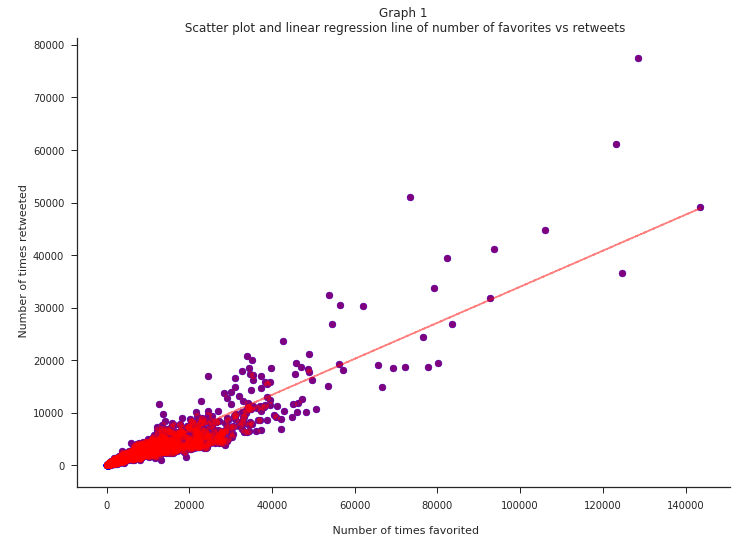

In [296]:
# Set plot to visually pleasing dimensions
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
#Asign x and y axis values
y=df_twitter_archive_master['retweet_count']
x=df_twitter_archive_master['favorite_count']
plt.scatter(x, y, color="blue", alpha=1.0, label='');
#Label x and y axis
plt.xlabel('\n Number of times favorited')
plt.ylabel(' \n Number of times retweeted')
# Draw the same scatter plot but with a regression line and overlay so scatter and regression are distinctive
m,b = np.polyfit(x, y, 1)
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x,y, 'yo', x, fit_fn(x), '--k', color="red", alpha=0.5, label="Lnear regression")
#axis removal
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
#plot label and graph
ax.set_title("Graph 1\n Scatter plot and linear regression line of number of favorites vs retweets")
# Save plot
plt.savefig('graph1.png')
#Plot graph
plt.show();

#### Note
We see here a predictable relationship between the number of times a tweet is favorited in relation to the number of times it is retweeted. In general the relationship is poistively linear. 

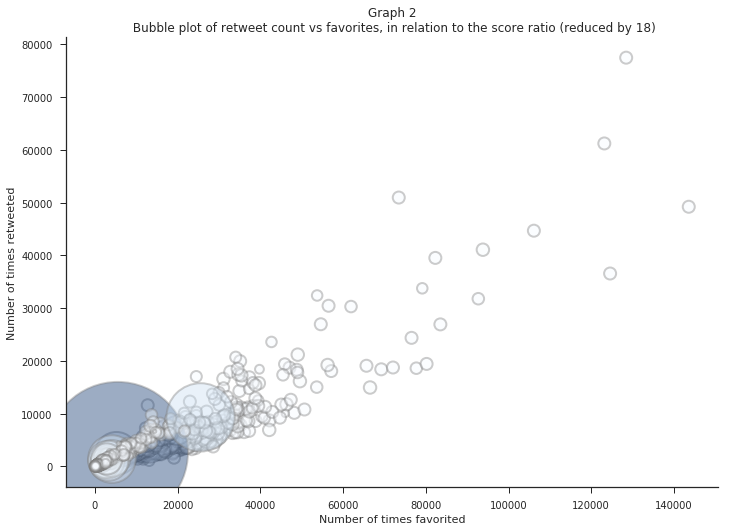

In [295]:
# Set plot to visually pleasing dimensions
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
# Define variables to be included in plot
x = df_twitter_archive_master['favorite_count']
y = df_twitter_archive_master['retweet_count']
z = df_twitter_archive_master['score_ratio']/18
# Change color with c and alpha. I map the color to the z axis value.
plt.scatter(x, y, s=z*2000, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
#axis removal
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
# Add titles (main and on axis)
plt.xlabel("Number of times favorited")
plt.ylabel("Number of times retweeted")
plt.title("Graph 2\n Bubble plot of retweet count vs favorites, in relation to the score ratio (reduced by 18)")
# Save plot
plt.savefig('graph2.png')
#Plot graph
plt.show()


#### Note
To drive the message home about the score attributed to the dogs, I ran the same scatter plot but sized each plot point in relationship to the score_ratio/18. It is pretty clear that the score_ratio does not impact the number of times that the tweet is favorited or retweeted.

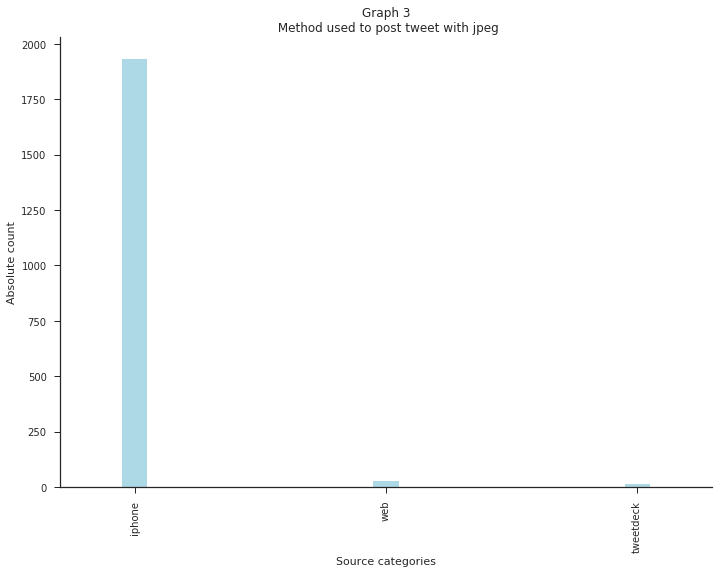

In [294]:
# Set plot to visually pleasing dimensions
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
#Bar plot of categories in source
df_twitter_archive_master['source'].value_counts().plot(kind='bar', color='lightblue', width=0.1)
#axis removal
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
# Add titles (main and on axis)
plt.xlabel("Source categories")
plt.ylabel("Absolute count")
plt.title("Graph 3\n Method used to post tweet with jpeg")
# Save plot
plt.savefig('graph3.png')
#Plot graph
plt.show();

#### Note 
The method most used to post tweets with jpegs from this dataset to WeRateDogs is overwhelmingly directly from the iPhone app, followed by twitter's webclient and finaly tweetdeck. 

In [293]:
# To get an idea of the type of dog breed most frequently posted in these tweets I make a simple list using value.counts()
display(df_twitter_archive_master['best_dog_prediction'].value_counts())

unpredictable                     305
golden_retriever                  156
Labrador_retriever                106
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               48
Samoyed                            42
Pomeranian                         41
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Siberian_husky                     20
Staffordshire_bullterrier          20
beagle                             20
Shih-Tzu                           20
Maltese_dog                        19
Shetland_sheepdog                  18
Rottweiler                         18
basset                             17
kuvasz      

#### Note
Very quickly we observe that most jpegs were not deciferable by the neural network. After this the top three dog breeds tweeted in this data set were the Golden Retriever, then the Labrador and  the Pembroke

#### Note
Finally to make use of the timestamp column I run a line plot of the score_ratio. 

In [231]:
#To utilize date time without damaging the archive_master dataframe I create a time dataframe and index timestamp
df_time_graph = df_twitter_archive_master
#As before convert the timestamp into a datetime
df_time_graph['timestamp'] = pd.to_datetime(df_time_graph['timestamp'])
#Set the timestamp as the index for df_time_graph data frame
df_time_graph.set_index('timestamp', inplace=True)

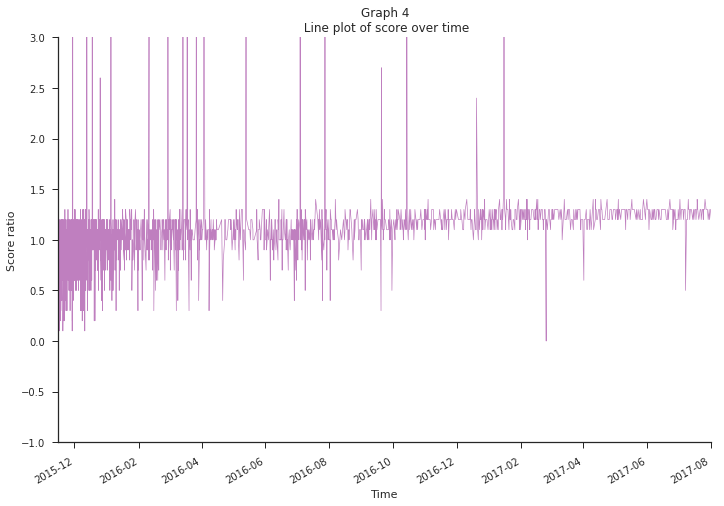

In [292]:
# Set plot to visually pleasing dimensions
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
#Plot graph
df_time_graph['score_ratio'].plot(alpha=0.5,aa=True, c='purple', lw=0.7)
# Limit the y axis focus to only consider ratios between -1 and 3
plt.ylim(-1, 3)
#axis removal
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
# Add titles (main and on axis)
plt.xlabel("Time")
plt.ylabel("Score ratio")
plt.title("Graph 4\n Line plot of score over time")
# Save plot
plt.savefig('graph4.png')
#Plot graph
plt.show();


#### Note
We observe that initially the score tends to be below 1. However, as time progresses the scores become closer towards 1- in this sense they "regress towards the mean" of 1. Additionally the density of post diminishes (this is observed by the color becoming lighter as time progresses).